In [1]:
from tensorflow import keras

In [2]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [3]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [6]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

In [7]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 1ms/step - loss: 1.2996 - accuracy: 0.6033 - val_loss: 0.8860 - val_accuracy: 0.7134
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7974 - accuracy: 0.7367 - val_loss: 0.7102 - val_accuracy: 0.7690
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6820 - accuracy: 0.7781 - val_loss: 0.6335 - val_accuracy: 0.7984
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6212 - accuracy: 0.7980 - val_loss: 0.5874 - val_accuracy: 0.8100
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5818 - accuracy: 0.8088 - val_loss: 0.5590 - val_accuracy: 0.8178
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5540 - accuracy: 0.8164 - val_loss: 0.5320 - val_accuracy: 0.8296
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5332 - accuracy: 0.8221 - val_loss: 0.5170 - val_accuracy:

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 1ms/step - loss: 1.2822 - accuracy: 0.6152 - val_loss: 0.8733 - val_accuracy: 0.7122
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7838 - accuracy: 0.7443 - val_loss: 0.6997 - val_accuracy: 0.7776
Epoch 3/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.6702 - accuracy: 0.7832 - val_loss: 0.6249 - val_accuracy: 0.8014
Epoch 4/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.6103 - accuracy: 0.8009 - val_loss: 0.5788 - val_accuracy: 0.8162
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5723 - accuracy: 0.8113 - val_loss: 0.5485 - val_accuracy: 0.8258
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5459 - accuracy: 0.8180 - val_loss: 0.5258 - val_accuracy: 0.8294
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5256 - accuracy: 0.8221 - val_loss: 0.5082 - val_accuracy:

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

In [10]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [11]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 20s 10ms/step - loss: 1.0539 - accuracy: 0.6159 - val_loss: 0.7622 - val_accuracy: 0.7086
Epoch 2/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.6706 - accuracy: 0.7619 - val_loss: 0.6126 - val_accuracy: 0.7824
Epoch 3/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.5866 - accuracy: 0.7925 - val_loss: 0.5622 - val_accuracy: 0.7972
Epoch 4/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.5409 - accuracy: 0.8092 - val_loss: 0.5247 - val_accuracy: 0.8194
Epoch 5/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.5045 - accuracy: 0.8233 - val_loss: 0.5068 - val_accuracy: 0.8202
Epoch 6/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.5183 - accuracy: 0.8183 - val_loss: 0.4646 - val_accuracy: 0.8362
Epoch 7/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4615 - accuracy: 0.8381 - val_loss: 0.4426 -

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_107 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_108 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [14]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [15]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8332 - accuracy: 0.7202 - val_loss: 0.5752 - val_accuracy: 0.8060
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5858 - accuracy: 0.7990 - val_loss: 0.5027 - val_accuracy: 0.8298
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5336 - accuracy: 0.8148 - val_loss: 0.4705 - val_accuracy: 0.8426
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5033 - accuracy: 0.8248 - val_loss: 0.4481 - val_accuracy: 0.8478
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4831 - accuracy: 0.8316 - val_loss: 0.4353 - val_accuracy: 0.8546
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4683 - accuracy: 0.8364 - val_loss: 0.4239 - val_accuracy: 0.8544
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4542 - accuracy: 0.8396 - val_loss: 0.4154 - val_accuracy:

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9053 - accuracy: 0.7025 - val_loss: 0.6142 - val_accuracy: 0.7956
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6192 - accuracy: 0.7923 - val_loss: 0.5278 - val_accuracy: 0.8242
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5586 - accuracy: 0.8103 - val_loss: 0.4879 - val_accuracy: 0.8354
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5222 - accuracy: 0.8205 - val_loss: 0.4638 - val_accuracy: 0.8426
Epoch 5/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4999 - accuracy: 0.8275 - val_loss: 0.4467 - val_accuracy: 0.8474
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4826 - accuracy: 0.8328 - val_loss: 0.4351 - val_accuracy: 0.8492
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4703 - accuracy: 0.8373 - val_loss: 0.4259 - val_accuracy:

In [17]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
optimizer = keras.optimizers.SGD(clipnorm=1.0)

In [18]:
import numpy as np

def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [19]:
X_train_A.shape

(43986, 28, 28)

In [20]:
X_train_B.shape

(200, 28, 28)

In [21]:
y_train_B

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.], dtype=float32)

In [22]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

history = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.5592 - accuracy: 0.8184 - val_loss: 0.3760 - val_accuracy: 0.8744
Epoch 2/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.3455 - accuracy: 0.8818 - val_loss: 0.3210 - val_accuracy: 0.8906
Epoch 3/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.3092 - accuracy: 0.8931 - val_loss: 0.2993 - val_accuracy: 0.8964
Epoch 4/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2910 - accuracy: 0.8998 - val_loss: 0.2857 - val_accuracy: 0.9023
Epoch 5/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2783 - accuracy: 0.9042 - val_loss: 0.2747 - val_accuracy: 0.9053
Epoch 6/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2687 - accuracy: 0.9081 - val_loss: 0.2686 - val_accuracy: 0.9073
Epoch 7/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2609 - accuracy: 0.9097 - val_loss: 0.2618 - val_accuracy:

In [23]:
model_A.save("my_model_A.h5")

In [24]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

model_B.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 26ms/step - loss: 0.6961 - accuracy: 0.5300 - val_loss: 0.6214 - val_accuracy: 0.6359
Epoch 2/20
7/7 [==============================] - 0s 9ms/step - loss: 0.5837 - accuracy: 0.6700 - val_loss: 0.5303 - val_accuracy: 0.7627
Epoch 3/20
7/7 [==============================] - 0s 9ms/step - loss: 0.4959 - accuracy: 0.7650 - val_loss: 0.4552 - val_accuracy: 0.8519
Epoch 4/20
7/7 [==============================] - 0s 9ms/step - loss: 0.4228 - accuracy: 0.8750 - val_loss: 0.3991 - val_accuracy: 0.8915
Epoch 5/20
7/7 [==============================] - 0s 9ms/step - loss: 0.3681 - accuracy: 0.9100 - val_loss: 0.3515 - val_accuracy: 0.9209
Epoch 6/20
7/7 [==============================] - 0s 9ms/step - loss: 0.3216 - accuracy: 0.9500 - val_loss: 0.3141 - val_accuracy: 0.9473
Epoch 7/20
7/7 [==============================] - 0s 9ms/step - loss: 0.2857 - accuracy: 0.9650 - val_loss: 0.2845 - val_accuracy: 0.9483
Epoch 8/20
7/7 [=================

In [25]:
model_A.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_113 (Dense)           (None, 300)               235500    
                                                                 
 dense_114 (Dense)           (None, 100)               30100     
                                                                 
 dense_115 (Dense)           (None, 50)                5050      
                                                                 
 dense_116 (Dense)           (None, 50)                2550      
                                                                 
 dense_117 (Dense)           (None, 50)                2550      
                                                                 
 dense_118 (Dense)           (None, 8)                

In [26]:
model_B.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_119 (Dense)           (None, 300)               235500    
                                                                 
 dense_120 (Dense)           (None, 100)               30100     
                                                                 
 dense_121 (Dense)           (None, 50)                5050      
                                                                 
 dense_122 (Dense)           (None, 50)                2550      
                                                                 
 dense_123 (Dense)           (None, 50)                2550      
                                                                 
 dense_124 (Dense)           (None, 1)                

In [27]:
model_A = keras.models.load_model("my_model_A.h5")
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [28]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 26ms/step - loss: 0.2947 - accuracy: 0.8800 - val_loss: 0.2970 - val_accuracy: 0.8722
Epoch 2/4
7/7 [==============================] - 0s 8ms/step - loss: 0.2790 - accuracy: 0.8950 - val_loss: 0.2842 - val_accuracy: 0.8925
Epoch 3/4
7/7 [==============================] - 0s 8ms/step - loss: 0.2664 - accuracy: 0.8950 - val_loss: 0.2717 - val_accuracy: 0.9057
Epoch 4/4
7/7 [==============================] - 0s 8ms/step - loss: 0.2542 - accuracy: 0.9000 - val_loss: 0.2606 - val_accuracy: 0.9118


In [29]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
7/7 [==============================] - 0s 26ms/step - loss: 0.1821 - accuracy: 0.9550 - val_loss: 0.1345 - val_accuracy: 0.9696
Epoch 2/16
7/7 [==============================] - 0s 9ms/step - loss: 0.1107 - accuracy: 0.9800 - val_loss: 0.1012 - val_accuracy: 0.9838
Epoch 3/16
7/7 [==============================] - 0s 9ms/step - loss: 0.0874 - accuracy: 0.9850 - val_loss: 0.0862 - val_accuracy: 0.9868
Epoch 4/16
7/7 [==============================] - 0s 9ms/step - loss: 0.0757 - accuracy: 0.9850 - val_loss: 0.0785 - val_accuracy: 0.9899
Epoch 5/16
7/7 [==============================] - 0s 9ms/step - loss: 0.0689 - accuracy: 0.9850 - val_loss: 0.0732 - val_accuracy: 0.9909
Epoch 6/16
7/7 [==============================] - 0s 9ms/step - loss: 0.0635 - accuracy: 0.9850 - val_loss: 0.0684 - val_accuracy: 0.9919
Epoch 7/16
7/7 [==============================] - 0s 9ms/step - loss: 0.0590 - accuracy: 0.9850 - val_loss: 0.0648 - val_accuracy: 0.9919
Epoch 8/16
7/7 [=================

In [30]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.0449 - accuracy: 0.9930


[0.044870369136333466, 0.9929999709129333]

In [31]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.1320 - accuracy: 0.9815


[0.13198775053024292, 0.9815000295639038]

In [32]:
# 모멘텀 옵티마이저
keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

# 네스테로프 가속 경사
keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

# AdaGrad
keras.optimizers.Adagrad(learning_rate=0.001)

# RMSProp
keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

# Adam
keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# AdaMax
keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Nadam
keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [33]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.01, decay=1e-4), metrics=["accuracy"])

epoch = 25
history = model.fit(X_train_scaled, y_train, epochs=epoch, validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4913 - accuracy: 0.8259 - val_loss: 0.4277 - val_accuracy: 0.8554
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3838 - accuracy: 0.8625 - val_loss: 0.3803 - val_accuracy: 0.8644
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3492 - accuracy: 0.8751 - val_loss: 0.3662 - val_accuracy: 0.8670
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3277 - accuracy: 0.8824 - val_loss: 0.3601 - val_accuracy: 0.8750
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3107 - accuracy: 0.8888 - val_loss: 0.3551 - val_accuracy: 0.8760
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2980 - accuracy: 0.8926 - val_loss: 0.3422 - val_accuracy: 0.8816
Epoch 7/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2873 - accuracy: 0.8969 - val_loss: 0.3381 - val_accuracy:

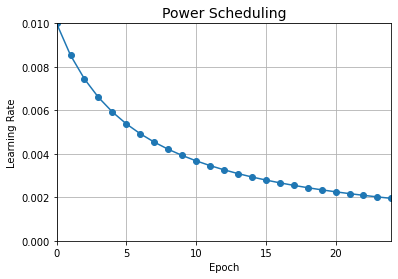

In [34]:
import math
import matplotlib.pyplot as plt

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(epoch)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, epoch - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [35]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [36]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

epoch = 25
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=epoch, validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9006 - accuracy: 0.7414 - val_loss: 0.7469 - val_accuracy: 0.7824 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7420 - accuracy: 0.7743 - val_loss: 0.8066 - val_accuracy: 0.7870 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7310 - accuracy: 0.7771 - val_loss: 0.8040 - val_accuracy: 0.7400 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5905 - accuracy: 0.8104 - val_loss: 0.6211 - val_accuracy: 0.8136 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5489 - accuracy: 0.8297 - val_loss: 0.9318 - val_accuracy: 0.8282 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4799 - accuracy: 0.8487 - val_loss: 0.6104 - val_accuracy: 0.8448 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 5s

In [37]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [38]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [39]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

epoch = 25
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)
history = model.fit(X_train_scaled, y_train, epochs=epoch, validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8636 - accuracy: 0.7538 - val_loss: 0.8578 - val_accuracy: 0.7728 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8343 - accuracy: 0.7585 - val_loss: 0.8375 - val_accuracy: 0.7978 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8795 - accuracy: 0.7399 - val_loss: 1.0284 - val_accuracy: 0.6956 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 1.1540 - accuracy: 0.6451 - val_loss: 1.0227 - val_accuracy: 0.6232 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 1.1342 - accuracy: 0.6156 - val_loss: 1.3267 - val_accuracy: 0.6238 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8304 - accuracy: 0.6797 - val_loss: 0.7087 - val_accuracy: 0.7482 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 5s

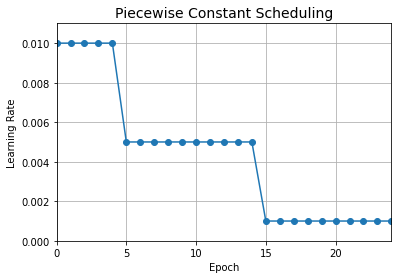

In [40]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, epoch - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [41]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

epoch = 25
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
history = model.fit(X_train_scaled, y_train, epochs=epoch, validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5949 - accuracy: 0.8043 - val_loss: 0.4756 - val_accuracy: 0.8402 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5096 - accuracy: 0.8361 - val_loss: 0.5048 - val_accuracy: 0.8312 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5082 - accuracy: 0.8419 - val_loss: 0.5282 - val_accuracy: 0.8428 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5003 - accuracy: 0.8479 - val_loss: 0.5929 - val_accuracy: 0.8440 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5295 - accuracy: 0.8463 - val_loss: 0.7910 - val_accuracy: 0.8160 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5282 - accuracy: 0.8503 - val_loss: 0.6159 - val_accuracy: 0.8486 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 3s

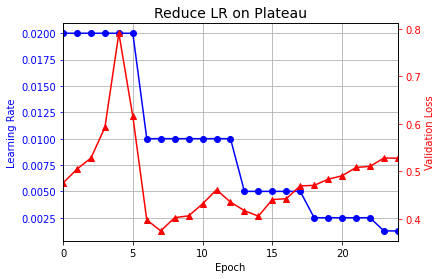

In [42]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, epoch - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [43]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

s = 20 * len(X_train) // 32
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

epoch = 25
history = model.fit(X_train_scaled, y_train, epochs=epoch, validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4856 - accuracy: 0.8290 - val_loss: 0.3981 - val_accuracy: 0.8624
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3803 - accuracy: 0.8651 - val_loss: 0.3790 - val_accuracy: 0.8712
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3469 - accuracy: 0.8768 - val_loss: 0.3673 - val_accuracy: 0.8726
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3252 - accuracy: 0.8851 - val_loss: 0.3559 - val_accuracy: 0.8742
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3082 - accuracy: 0.8908 - val_loss: 0.3522 - val_accuracy: 0.8802
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2954 - accuracy: 0.8958 - val_loss: 0.3395 - val_accuracy: 0.8776
Epoch 7/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2846 - accuracy: 0.8981 - val_loss: 0.3409 - val_accuracy:

In [44]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch], values=[0.01, 0.005, 0.001])

In [45]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [46]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

430/430 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.3770


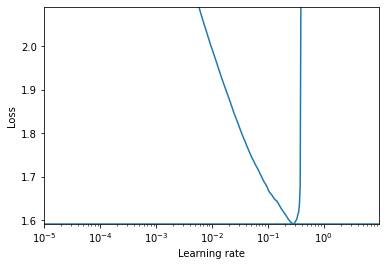

In [47]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [48]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [49]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 1s 3ms/step - loss: 0.6508 - accuracy: 0.7737 - val_loss: 0.4882 - val_accuracy: 0.8326
Epoch 2/25
430/430 [==============================] - 1s 3ms/step - loss: 0.4580 - accuracy: 0.8405 - val_loss: 0.4304 - val_accuracy: 0.8530
Epoch 3/25
430/430 [==============================] - 1s 3ms/step - loss: 0.4117 - accuracy: 0.8572 - val_loss: 0.4068 - val_accuracy: 0.8602
Epoch 4/25
430/430 [==============================] - 1s 3ms/step - loss: 0.3826 - accuracy: 0.8652 - val_loss: 0.3986 - val_accuracy: 0.8638
Epoch 5/25
430/430 [==============================] - 1s 3ms/step - loss: 0.3619 - accuracy: 0.8719 - val_loss: 0.3942 - val_accuracy: 0.8596
Epoch 6/25
430/430 [==============================] - 1s 3ms/step - loss: 0.3439 - accuracy: 0.8765 - val_loss: 0.3684 - val_accuracy: 0.8678
Epoch 7/25
430/430 [==============================] - 1s 3ms/step - loss: 0.3279 - accuracy: 0.8832 - val_loss: 0.3737 - val_accuracy: 0.8690
Epoch 

In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.L1(0.01)),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.L2(0.01)),
    keras.layers.Dense(10, activation="softmax", kernel_regularizer=keras.regularizers.L1L2(0.01)),
])

In [51]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense, activation="elu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.L2(0.01))

model = keras.models.Sequential([
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax"),
])

In [52]:
model = keras.models.Sequential([
    keras.layers.Dropout(0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax"),
])

In [56]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True), metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6671 - accuracy: 0.7556 - val_loss: 0.6675 - val_accuracy: 0.8258
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5595 - accuracy: 0.7935 - val_loss: 0.5574 - val_accuracy: 0.8438
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5239 - accuracy: 0.8062 - val_loss: 0.4903 - val_accuracy: 0.8498
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5045 - accuracy: 0.8129 - val_loss: 0.4692 - val_accuracy: 0.8552
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4934 - accuracy: 0.8173 - val_loss: 0.4726 - val_accuracy: 0.8536
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4779 - accuracy: 0.8231 - val_loss: 0.4575 - val_accuracy: 0.8662
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4707 - accuracy: 0.8255 - val_loss: 0.5061 - val_accuracy:

In [57]:
y_probas = np.stack([model(X_test_scaled, training=True) for sample in range(100)])
y_proba = y_probas.mean(axis=0)
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [59]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.14, 0.  , 0.82]],
      dtype=float32)

In [60]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.21, 0.  , 0.25]],
      dtype=float32)

In [61]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [65]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal", kernel_constraint=keras.constraints.max_norm(1.)),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal", kernel_constraint=keras.constraints.max_norm(1.)),
    keras.layers.Dense(10, activation="softmax")
])